In [35]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd # Loading of Dataset i.e already Contain Cleaned text after removing Stop words,html,punctuation,Stemming
final1= pd.read_csv('clenanedreview.csv',sep=',',encoding='utf-8')

In [3]:
final1.shape

(364171, 12)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score


In [5]:
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [6]:
final2=final1.sort_values('Time', ascending=True)

In [7]:
def partition(x):
    if x == 'positive':
        return 1
    return -1
actualScore = final2['Score']
positiveNegative = actualScore.map(partition) 
final2['Score'] = positiveNegative

In [8]:
y=final2['Score']

In [9]:
final3=final2.tail(40000)
y=y.tail(40000)

In [10]:
final3.shape

(40000, 12)

In [11]:
y.shape

(40000,)

# TF-IDF 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final3['CleanedText'].values, y, test_size=0.25, shuffle=True)



In [19]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_train)


In [20]:
final_tf_idf1 = tf_idf_vect.transform(X_test)

In [21]:
X_train=final_tf_idf
X_test=final_tf_idf1

# Gridsearch Cv on TF-IDF

In [24]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm
tuned_parameters = [{'C': [100,10,0.1],'gamma':[0.1,0.01,0.001]}]

In [25]:
model = GridSearchCV(svm.SVC(), tuned_parameters, scoring ='f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [34]:
acc=accuracy_score(y_test,y_pred)*100
print('The Testing accuracy=%f'%(acc))

The Testing accuracy=91.350000


In [35]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)*100
print('The Training accuracy=%f'%(acc))

The Training accuracy=96.846667


In [27]:

labels=[1,-1]
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))


[[8002  279]
 [ 586 1133]]


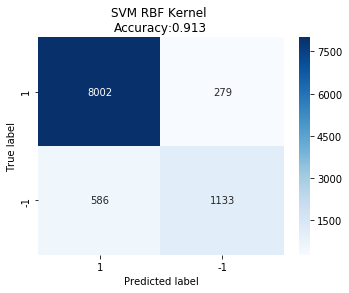

In [28]:
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Random Search cv For Tf-IDF

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(5, 15),"gamma": stats.uniform(0.08,0.15)}
model=RandomizedSearchCV(svm.SVC(), param_distributions=rand_list, scoring = 'f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

SVC(C=5.564747809813142, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1626603465290195,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9138


In [38]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
labels=[1,-1]
confusion_matrix(y_test, y_pred,labels)


array([[8022,  259],
       [ 603, 1116]], dtype=int64)

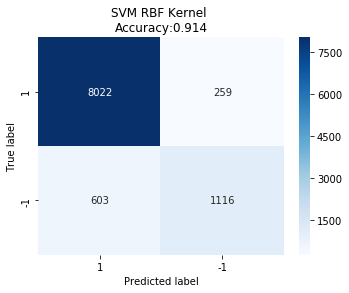

In [39]:
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
y_pred1=model.predict(X_train)
acc = accuracy_score(y_train, y_pred1) * 100
print('Training accuracy=%f' %(acc))

Training accuracy=96.993333


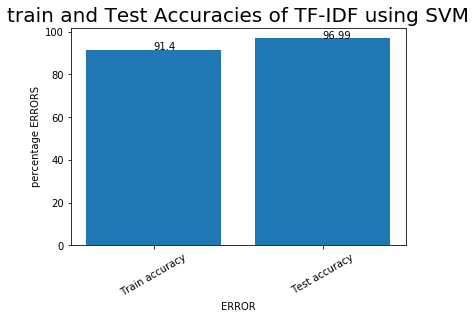

In [41]:
label=['Train accuracy','Test accuracy']
acc=[91.4,96.99]
index = np.arange(len(label))
barWidth=0.2

plt.bar(index, acc)
plt.xlabel('ERROR', fontsize=10)
plt.ylabel('percentage ERRORS', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Accuracies of TF-IDF using SVM').set_fontsize(20)
plt.show()
    

# BOW

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final3['CleanedText'].values, y, test_size=0.25)

In [13]:
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(X_train)
final_counts1=count_vect.transform(X_test)

In [14]:
X_train=final_counts
X_test=final_counts1

# Gridsearch cv on BOW

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import svm
tuned_parameters = [{'C': [100,10,0.1],'gamma':[0.1,0.01,0.001]}]


In [50]:
model = GridSearchCV(svm.SVC(), tuned_parameters, scoring = 'f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [51]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
labels=[1,-1]
confusion_matrix(y_test, y_pred,labels)

array([[7953,  262],
       [ 654, 1131]], dtype=int64)

In [53]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)*100
print('The Training accuracy=%f'%(acc))

The Training accuracy=99.253333


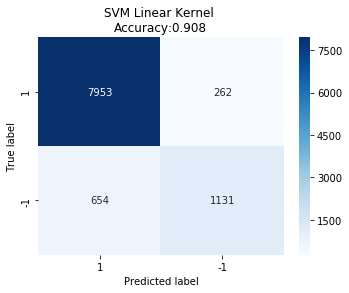

In [52]:
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

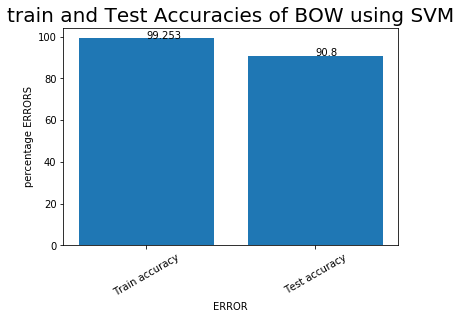

In [5]:
label=['Train accuracy','Test accuracy']
acc=[99.253,90.8]
index = np.arange(len(label))
barWidth=0.2

plt.bar(index, acc)
plt.xlabel('ERROR', fontsize=10)
plt.ylabel('percentage ERRORS', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Accuracies of BOW using SVM').set_fontsize(20)
plt.show()

# Random  Search Cv on BOW

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn import svm
rand_list = {"C": stats.uniform(8,10),"gamma": stats.uniform(0.001,0.07)}
model=RandomizedSearchCV(svm.SVC(), param_distributions=rand_list, scoring = 'f1_micro', cv=3,n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_estimator_)


SVC(C=17.529109653013705, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.004984440518443675,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [21]:
y_pred=model.predict(X_test)
labels=[1,-1]
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe Testing accuracy of the SVM classifier= %f ' % (acc))

[[7939  334]
 [ 521 1206]]

The Testing accuracy of the SVM classifier= 91.450000 


In [18]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)
print('Training accuracy=%f'%(acc))

Training accuracy=0.985733


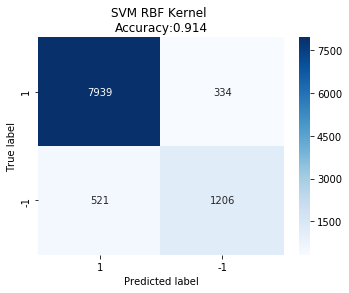

In [19]:
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

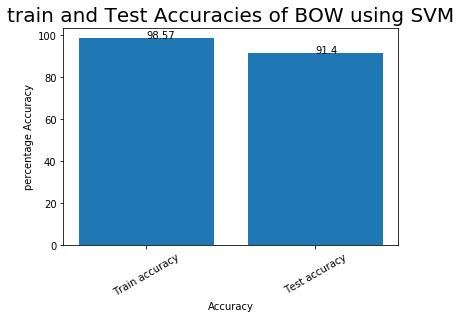

In [20]:
label=['Train accuracy','Test accuracy']
acc=[98.57,91.4]
index = np.arange(len(label))
barWidth=0.2

plt.bar(index, acc)
plt.xlabel('Accuracy', fontsize=10)
plt.ylabel('percentage Accuracy', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Accuracies of BOW using SVM').set_fontsize(20)
plt.show()

# W2V

In [12]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [13]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
#print(stop)
print('************************************')
print(sno.stem('tasty'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
************************************
tasti


In [14]:
i=0
list_of_sent=[]
for sent in final3['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(sno.stem(cleaned_words.lower()))
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [15]:
len(list_of_sent)

40000

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(list_of_sent, y, test_size=0.25, random_state=42)


In [17]:
w2v_model=gensim.models.Word2Vec(X_train,min_count=5,size=300, workers=4) 

In [18]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_train: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

30000
300


In [19]:
import numpy as np
myarray = np.asarray(sent_vectors)
X_train=myarray

In [20]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_test: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

10000
300


In [21]:
import numpy as np
myarray1= np.asarray(sent_vectors)
X_test=myarray1

In [24]:
from sklearn.preprocessing import Imputer
impute=Imputer(strategy='mean')
impute.fit(X_train)
w2v=impute.transform(X_train)
type(w2v)


numpy.ndarray

# C and gamma value find using gridsearch cv

In [31]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm
tuned_parameters = [{'C': [100,10,1,0.1],'gamma':[0.1,0.01,0.001,0.0001]}]


In [32]:
model = GridSearchCV(svm.SVC(), tuned_parameters, scoring = 'f1_micro', cv=3,n_jobs=-1)
model.fit(w2v, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8968


In [33]:

labels=[1,-1]
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the SVM with rbf kernel is %f%%' % (acc))

[[8067  257]
 [ 775  901]]

The accuracy of the SVM with rbf kernel is 89.680000%


In [35]:
y_pred1=model.predict(w2v)
acc=accuracy_score(y_train,y_pred1)*100
print('The Training accuracy=%f'%(acc))

The Training accuracy=90.653333


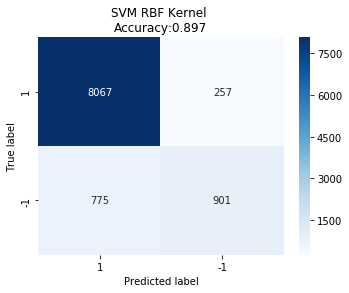

In [34]:
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

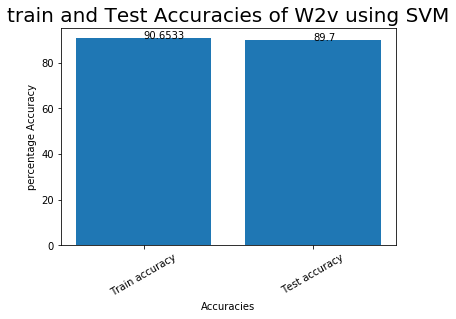

In [36]:
label=['Train accuracy','Test accuracy']
acc=[90.6533,89.7]
index = np.arange(len(label))
barWidth=0.2

plt.bar(index, acc)
plt.xlabel('Accuracies', fontsize=10)
plt.ylabel('percentage Accuracy', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Accuracies of W2v using SVM').set_fontsize(20)
plt.show()

# Randomised Search cv on w2v

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn import svm
rand_list = {"C": stats.uniform(99,2),"gamma": stats.uniform(0.005,0.009)}
model=RandomizedSearchCV(svm.SVC(), param_distributions=rand_list, scoring = 'f1_micro', cv=3,n_jobs=-1)
model.fit(w2v, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

SVC(C=100.07991801198365, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01361577299434754,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.8965


In [28]:
labels=[1,-1]
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of SVM=%f%%' % ( acc))

[[8048  276]
 [ 759  917]]

The accuracy of SVM=89.650000%


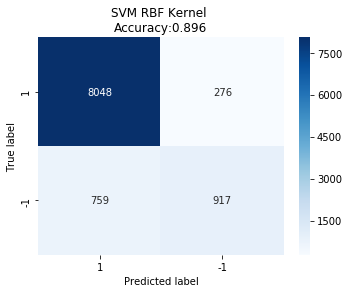

In [29]:
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
y_pred=model.predict(w2v)
acc=accuracy_score(y_train,y_pred)
print('The Training Accuracy=%f' %(acc))

The Training Accuracy=0.911800


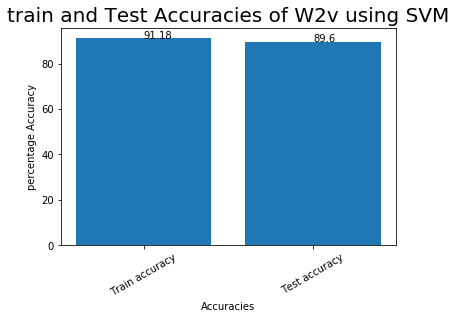

In [31]:
label=['Train accuracy','Test accuracy']
acc=[91.18,89.6]
index = np.arange(len(label))
barWidth=0.2

plt.bar(index, acc)
plt.xlabel('Accuracies', fontsize=10)
plt.ylabel('percentage Accuracy', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Accuracies of W2v using SVM').set_fontsize(20)
plt.show()

# Tf-IDF-W2V

In [16]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(final3['CleanedText'].values)
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [17]:
final_tf_idf.shape

(40000, 24033)

In [18]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=300, workers=4) 

In [19]:
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row,tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
        except:
            pass
    #print(weight_sum)
    sent_vec /= (weight_sum)
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [20]:
tfidf_w2v=np.asarray(tfidf_sent_vectors)

In [21]:
tfidf_w2v.shape

(40000, 300)

In [23]:
from sklearn.preprocessing import Imputer
impute=Imputer(strategy='mean')
impute.fit(tfidf_w2v)
tfidf_w2v1=impute.transform(tfidf_w2v)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import svm
tuned_parameters = [{'C': [1000,100,10,1],'gamma':[0.1,0.01,0.001,0.0001]}]
X_train, X_test, y_train, y_test = train_test_split(tfidf_w2v1, y, train_size=0.75)

# C and gamma Value using grid Search cv

In [25]:
model = GridSearchCV(svm.SVC(), tuned_parameters, scoring = 'f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8914


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=[1,-1]
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred,labels))
acc = accuracy_score(y_test, y_pred) * 100
print('\nThe accuracy of the SVM classifier is %f%%' % ( acc))

[[7912  332]
 [ 754 1002]]

The accuracy of the SVM classifier is 89.140000%


In [29]:
y_pred=model.predict(X_train)
acc=accuracy_score(y_train,y_pred)
print('The Training Accuracy=%f' %(acc))

The Training Accuracy=0.930067


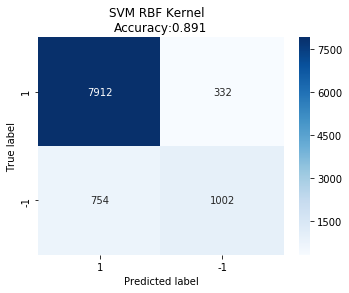

In [28]:
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM RBF Kernel  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

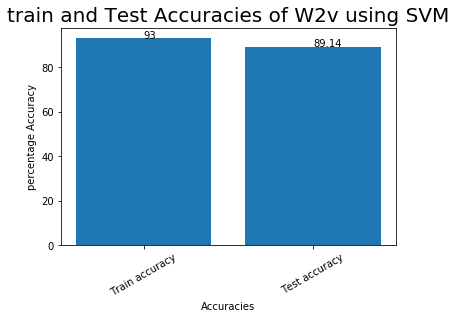

In [30]:
label=['Train accuracy','Test accuracy']
acc=[93,89.14]
index = np.arange(len(label))
barWidth=0.2

plt.bar(index, acc)
plt.xlabel('Accuracies', fontsize=10)
plt.ylabel('percentage Accuracy', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Accuracies of W2v using SVM').set_fontsize(20)
plt.show()

# Randomised Search cv for TfIdf-w2v

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
rand_list = {"C": stats.uniform(99,2),"gamma": stats.uniform(0.05,0.09)}
model=RandomizedSearchCV(svm.SVC(), param_distributions=rand_list, scoring = 'f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)
print(model.score(X_test, y_test))

SVC(C=99.68247914572879, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.054135799998552274,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.8716666666666667


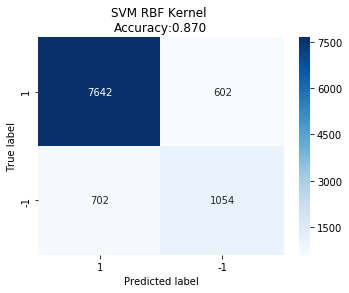

In [32]:
labels=[1,-1]
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)*100
print('Training accuracy of random search cv is =%f' %(acc))

Training accuracy of random search cv is =99.556667


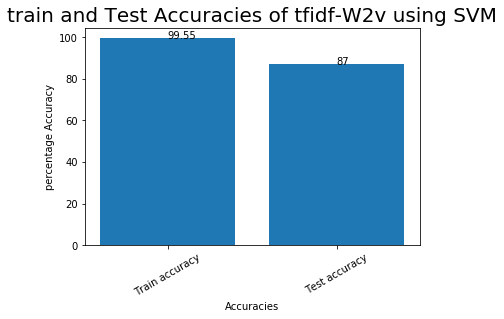

In [34]:
label=['Train accuracy','Test accuracy']
acc=[99.55,87]
index = np.arange(len(label))
barWidth=0.2

plt.bar(index, acc)
plt.xlabel('Accuracies', fontsize=10)
plt.ylabel('percentage Accuracy', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
for i in range(len(label)):
    plt.text(x=i,y=acc[i],s=acc[i],size=10)
plt.title('train and Test Accuracies of tfidf-W2v using SVM').set_fontsize(20)
plt.show()

# Conclusion Of SVM using RBF Kernel:

1. Optimal C and Gamma value , Accuracy and  shown below:-

In [37]:

import toyplot
data = dict()
data["Parameter"] = ["BOW", "TF-IDF", "W2V","W2V-TF-IDF"]
data["Test accuracy "] = [91.45,91.35,89.68,89.14]
data["Train accuracy "] = [98.53,96.84,90.6533,93.0067]
data["Optimal C"]=[17.529,10,100,100]
data["Optimal gamma"] = [0.00498,0.1,0.01,0.01]
toyplot.data.Table(data)

Optimal C,Optimal gamma,Parameter,Test accuracy,Train accuracy
17.529,0.00498,BOW,91.45,98.53
10.0,0.1,TF-IDF,91.35,96.84
100.0,0.01,W2V,89.68,90.6533
100.0,0.01,W2V-TF-IDF,89.14,93.0067


# Program Flow
1. Data is first Pre-Processed i.e removing stopwords,html,Punctuation marks,Duplicate Reviews
2. arranged data in ascending order of time.
3. Split The Cleaned text data into train and test
4. Text to vector conversion methods are used
5. For Tf-idf-w2v and avg w2v NAN Value occurs ,So Imputer is used.
6. For Each Method, find optimal value of hyperparameter i.e C and Gamma , RandomSearch  and Grid Search algorithm are implemented.
7. Train accuracies and Test accuracies are find for all values of C and gamma.
8. Confusion matrix are drawn for best values of Hyperparameter.


# SVM using SGD Classifier with hinge loss

In [9]:
final3=final2.tail(100000)
y=y.tail(100000)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final3['CleanedText'].values, y, test_size=0.3, shuffle=True)



# TF-IDF for Linear SVM

In [11]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_train)

In [12]:
final_tf_idf1 = tf_idf_vect.transform(X_test)

In [13]:
X_train=final_tf_idf
X_test=final_tf_idf1

In [14]:
X_train.shape

(70000, 31783)

In [15]:
X_test.shape

(30000, 31783)

In [25]:
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
tuned_parameters = [{'alpha':[10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0001]}]

In [26]:
model = GridSearchCV(linear_model.SGDClassifier(), tuned_parameters, scoring ='f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


In [27]:
model.grid_scores_

[mean: 0.82609, std: 0.00000, params: {'alpha': 10},
 mean: 0.82609, std: 0.00000, params: {'alpha': 1},
 mean: 0.82609, std: 0.00000, params: {'alpha': 0.5},
 mean: 0.82609, std: 0.00000, params: {'alpha': 0.1},
 mean: 0.82609, std: 0.00000, params: {'alpha': 0.05},
 mean: 0.82609, std: 0.00000, params: {'alpha': 0.01},
 mean: 0.82609, std: 0.00000, params: {'alpha': 0.005},
 mean: 0.82866, std: 0.00015, params: {'alpha': 0.001},
 mean: 0.90691, std: 0.00167, params: {'alpha': 0.0001}]

In [28]:
x=len(model.grid_scores_)
cvscore1=[]
for i in range(x):
    cvscore=model.grid_scores_[i]
    cvscore1.append(cvscore[1])
cverror=[1-x for x in cvscore1]    
    

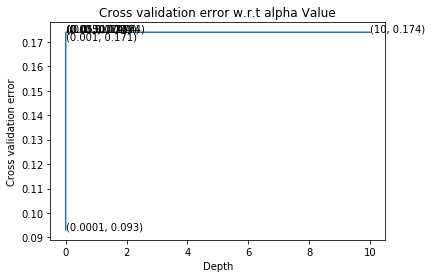

the Cross validation error error for each alpha value is :  [0.174 0.174 0.174 0.174 0.174 0.174 0.174 0.171 0.093]


In [35]:
alpha=[10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0001]
plt.plot(alpha, cverror)

for xy in zip(alpha, np.round(cverror,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Depth')
plt.ylabel('Cross validation error')
plt.title('Cross validation error w.r.t alpha Value')
plt.show()

print("the Cross validation error error for each alpha value is : ", np.round(cverror,3))

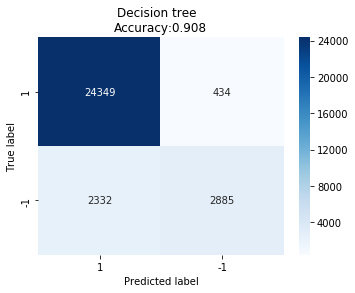

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=[1,-1]
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('Decision tree  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)*100
print('Training Accuracy=%f' %(acc))

Training Accuracy=91.641429


# BOW for Linear SVM

In [37]:
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(X_train)
final_counts1=count_vect.transform(X_test)

In [38]:
X_train=final_counts
X_test=final_counts1

In [39]:
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
tuned_parameters = [{'alpha':[10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0001]}]

In [40]:
model = GridSearchCV(linear_model.SGDClassifier(), tuned_parameters, scoring ='f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


In [41]:
model.grid_scores_

[mean: 0.82681, std: 0.00000, params: {'alpha': 10},
 mean: 0.82681, std: 0.00000, params: {'alpha': 1},
 mean: 0.82681, std: 0.00000, params: {'alpha': 0.5},
 mean: 0.84303, std: 0.00132, params: {'alpha': 0.1},
 mean: 0.86477, std: 0.00149, params: {'alpha': 0.05},
 mean: 0.89610, std: 0.00083, params: {'alpha': 0.01},
 mean: 0.90244, std: 0.00107, params: {'alpha': 0.005},
 mean: 0.90861, std: 0.00209, params: {'alpha': 0.001},
 mean: 0.89061, std: 0.01697, params: {'alpha': 0.0001}]

In [42]:
x=len(model.grid_scores_)
cvscore1=[]
for i in range(x):
    cvscore=model.grid_scores_[i]
    cvscore1.append(cvscore[1])
cverror=[1-x for x in cvscore1]    
    

In [45]:
cvscore1

[0.8268142857142857,
 0.8268142857142857,
 0.8268142857142857,
 0.8430285714285715,
 0.8647714285714285,
 0.8961,
 0.9024428571428571,
 0.9086142857142857,
 0.8906142857142857]

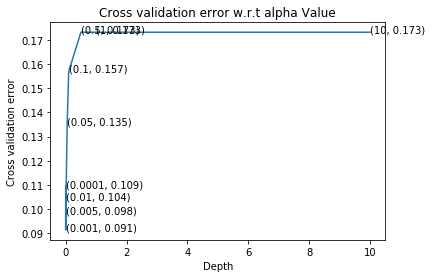

the Cross validation error error for each alpha value is :  [0.173 0.173 0.173 0.157 0.135 0.104 0.098 0.091 0.109]


In [43]:
alpha=[10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0001]
plt.plot(alpha, cverror)

for xy in zip(alpha, np.round(cverror,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Depth')
plt.ylabel('Cross validation error')
plt.title('Cross validation error w.r.t alpha Value')
plt.show()

print("the Cross validation error error for each alpha value is : ", np.round(cverror,3))

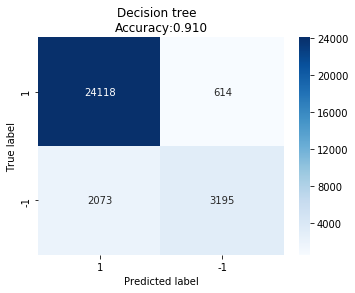

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=[1,-1]
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('Decision tree  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)*100
print('Training Accuracy=%f' %(acc))

Training Accuracy=92.465714


# W2V With Linear SVM

In [50]:
i=0
list_of_sent=[]
for sent in final3['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(sno.stem(cleaned_words.lower()))
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [51]:
len(list_of_sent)

100000

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(list_of_sent, y, test_size=0.3, random_state=42)


In [53]:
w2v_model=gensim.models.Word2Vec(X_train,min_count=5,size=300, workers=4) 

In [54]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_train: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

70000
300


In [55]:
import numpy as np
myarray = np.asarray(sent_vectors)
X_train=myarray

In [56]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in X_test: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

30000
300


In [57]:
import numpy as np
myarray1= np.asarray(sent_vectors)
X_test=myarray1

In [63]:
from sklearn.preprocessing import Imputer
impute=Imputer(strategy='mean')
impute.fit(X_test)
X_test1=impute.transform(X_test)
type(X_test1)


numpy.ndarray

In [64]:
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
tuned_parameters = [{'alpha':[10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0001]}]

In [65]:
model = GridSearchCV(linear_model.SGDClassifier(), tuned_parameters, scoring ='f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


In [66]:
model.grid_scores_

[mean: 0.82517, std: 0.00002, params: {'alpha': 10},
 mean: 0.82517, std: 0.00002, params: {'alpha': 1},
 mean: 0.82517, std: 0.00002, params: {'alpha': 0.5},
 mean: 0.82517, std: 0.00002, params: {'alpha': 0.1},
 mean: 0.82517, std: 0.00002, params: {'alpha': 0.05},
 mean: 0.85967, std: 0.00196, params: {'alpha': 0.01},
 mean: 0.87604, std: 0.00156, params: {'alpha': 0.005},
 mean: 0.88813, std: 0.00163, params: {'alpha': 0.001},
 mean: 0.88746, std: 0.00275, params: {'alpha': 0.0001}]

In [67]:
x=len(model.grid_scores_)
cvscore1=[]
for i in range(x):
    cvscore=model.grid_scores_[i]
    cvscore1.append(cvscore[1])
cverror=[1-x for x in cvscore1]    
    

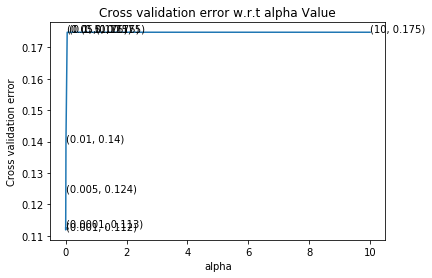

the Cross validation error error for each alpha value is :  [0.175 0.175 0.175 0.175 0.175 0.14  0.124 0.112 0.113]


In [69]:
alpha=[10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0001]
plt.plot(alpha, cverror)

for xy in zip(alpha, np.round(cverror,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('alpha')
plt.ylabel('Cross validation error')
plt.title('Cross validation error w.r.t alpha Value')
plt.show()

print("the Cross validation error error for each alpha value is : ", np.round(cverror,3))

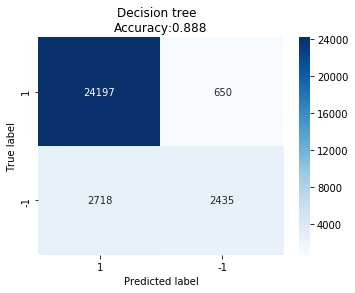

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=[1,-1]
y_pred=model.predict(X_test1)
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('Decision tree  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)*100
print('Training Accuracy=%f' %(acc))

Training Accuracy=88.772857


# TF-IDF W2V 

In [88]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=300, workers=4) 

In [89]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(final3['CleanedText'].values)

In [90]:
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row,tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
        except:
            pass
    #print(weight_sum)
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [92]:
len(tfidf_sent_vectors)

100000

In [94]:
myarray2=np.asarray(tfidf_sent_vectors)

In [96]:
from sklearn.preprocessing import Imputer
impute=Imputer(strategy='mean')
impute.fit(myarray2)
tfidf_w2v=impute.transform(myarray2)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_w2v, y, train_size=0.7)

In [102]:
model = GridSearchCV(linear_model.SGDClassifier(), tuned_parameters, scoring ='f1_micro', cv=3)
model.fit(X_train, y_train)
print(model.best_estimator_)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


In [103]:
model.grid_scores_

[mean: 0.82631, std: 0.00001, params: {'alpha': 10},
 mean: 0.82631, std: 0.00001, params: {'alpha': 1},
 mean: 0.82631, std: 0.00001, params: {'alpha': 0.5},
 mean: 0.82679, std: 0.00013, params: {'alpha': 0.1},
 mean: 0.83923, std: 0.00110, params: {'alpha': 0.05},
 mean: 0.87230, std: 0.00189, params: {'alpha': 0.01},
 mean: 0.87771, std: 0.00247, params: {'alpha': 0.005},
 mean: 0.88570, std: 0.00047, params: {'alpha': 0.001},
 mean: 0.87427, std: 0.00451, params: {'alpha': 0.0001}]

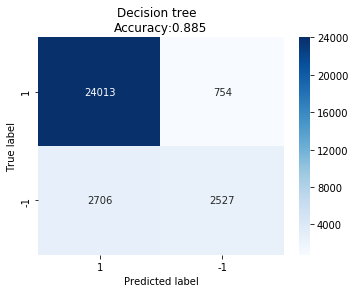

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
labels=[1,-1]
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred,labels) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','-1'], 
                     columns = ['1','-1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title('Decision tree  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [105]:
y_pred1=model.predict(X_train)
acc=accuracy_score(y_train,y_pred1)*100
print('Training Accuracy=%f' %(acc))

Training Accuracy=88.562857


# Conclusion From RBF and Linear SVM

In [38]:
import toyplot
data = dict()
data["Parameter"] = ["BOW", "TF-IDF", "W2V","W2V-TF-IDF"]
data[" Test accuracy using rbf kernel "] = [91.45,91.35,89.68,89.14]
data[" Train accuracy using rbf kernel "] = [98.57,96.84,90.6533,93.0067]
data["Optimal C for rbf kernel"]=[17.529,10,100,100]
data["Optimal gamma for rbf kernel"] = [0.00498,0.1,0.01,0.01]
data["Train accuracy using Linear SVM "] = [92.46,91.64,88.77,88.56]
data["Test accuracy using Linear SVM "] = [91,90.8,88.8,88.5]
data["Optimal alpha for Linear SVM"] = [0.01,0.0001,0.001,0.001]
toyplot.data.Table(data)

Test accuracy using rbf kernel,Train accuracy using rbf kernel,Optimal C for rbf kernel,Optimal alpha for Linear SVM,Optimal gamma for rbf kernel,Parameter,Test accuracy using Linear SVM,Train accuracy using Linear SVM
91.45,98.57,17.529,0.01,0.00498,BOW,91.0,92.46
91.35,96.84,10.0,0.0001,0.1,TF-IDF,90.8,91.64
89.68,90.6533,100.0,0.001,0.01,W2V,88.8,88.77
89.14,93.0067,100.0,0.001,0.01,W2V-TF-IDF,88.5,88.56
